# ICS 635 HW 1 - Perceptron

### copied from aludert's Perceptron_data_faker:

In [12]:
#%matplotlib inline
import numpy as np
import random as rm
import matplotlib.pyplot as plt
import time
import matplotlib

In [69]:
def data_faker(N, m, b, c=1, rand_div = 'yes'):
    
    if rand_div == 'yes':
        
        slope_sign_choice = rm.random()
        
        if slope_sign_choice < 0.5:
            m_sign = -1
        else:
            m_sign = 1
            
        m = m_sign * rm.random() 
        
        intercep_sign_choice = rm.random()
        
        if intercep_sign_choice < 0.5:
            b_sign = -1
        else:
            b_sign = 1
            
        b = b_sign * rm.random()
        
    points = np.empty([N,3])
    
    for i in range(N):
        
        x_sign_choice = rm.random()
        
        if x_sign_choice < 0.5:
            x_sign = -1
        else:
            x_sign = 1
            
        x_i = x_sign * rm.random() *c
        #---------------------------------------
        
        y_sign_choice = rm.random()
        
        if y_sign_choice < 0.5:
            y_sign = -1
        else:
            y_sign = 1
            
        y_i = y_sign * rm.random() *c
        #----------------------------------------
        
        if y_i < m*x_i+b:
            l_i = 1
        elif y_i > m*x_i+b:
            l_i = -1
            
        points[i,0] = x_i
        points[i,1] = y_i
        points[i,2] = l_i
         
    return points, m, b

def scatter_plot(points, m, b, save='yes'):
    
    color = np.empty([len(points)], dtype=str)

    for i in range(len(points)):
        if points[i,2] < 0:
            color[i] = 'r'
        else:
            color[i] = 'b'
            
    step = np.amax(points[:,0]) - np.amin(points[:,0])/100
    x_dummy = np.arange(np.amin(points[:,0]), np.amax(points[:,0])+step, step)
    y_dummy = np.empty_like(x_dummy)
    y_dummy[:] = np.multiply(m, x_dummy) + b

    plt.scatter(points[:,0], points[:,1], c = color)
    plt.plot(x_dummy,y_dummy)
    N = len(points)
    if save == 'yes':
        plt.savefig('data_faker_p_N%s' % (str(N)), dpi=200, bbox_inches ='tight' )
    else:
        plt.show()

def scatter_plot_vid(points, m, b, slope, intercept, n, vid_dir = './vid'):
    
    color = np.empty([len(points)], dtype=str)

    for i in range(len(points)):
        if points[i,2] < 0:
            color[i] = 'r'
        else:
            color[i] = 'b'
            
    step = np.amax(points[:,0]) - np.amin(points[:,0])/100
    x_dummy = np.arange(np.amin(points[:,0]), np.amax(points[:,0])+step/2, step)
    y_dummy = np.empty_like(x_dummy)
    y_dummy[:] = np.multiply(m, x_dummy) + b
    y_dummy_p = np.empty_like(x_dummy)
    y_dummy_p[:] = np.multiply(slope, x_dummy) + intercept

    plt.scatter(points[:,0], points[:,1], c = color)
    plt.plot(x_dummy,y_dummy)
    plt.plot(x_dummy,y_dummy_p, c='g')
    
    plt.xlim([np.amin(points[:,0])-1,np.amax(points[:,0])+1])
    plt.ylim([np.amin(points[:,1])-1,np.amax(points[:,1])+1])
    
    N=len(points)
    plt.title('N = %s, Iteration %s\n' % (str(N), str(n)))
    plt.savefig(vid_dir+'/p_N%s_n%s' % (str(N), str(n)), dpi=200, bbox_inches ='tight' )
    plt.close()

### to produce points for boolean XOR case:

In [63]:
def xor():
    
    xor_array =  np.array([[0,1,1], [1,0,-1], [0,-1,1], [-1,0,-1]])
    
    return xor_array

### test function:

In [64]:
step_function = lambda f: -1 if f <= 0 else 1

### Perceptron Algorithm:

In [65]:
def perceptron(points, w=(0,0,0), c=0.5, n_iter=50, video='no', m=0, b=0, vid_dir = './vid'):
    
    test_training = np.ones([len(points),4])
    test_training[:,1:] =  points
    
    misclassed = True
    n = 0
    num_points_tested = 0
    slope = 0
    intercept = 0
    
    while (misclassed and n < n_iter):
        n += 1
        wrong_line = 0
        
        for test_val in test_training:
            point = test_val[:3]
            desired = test_val[3]
            result = np.dot(w, point)
            f = step_function(result)
            num_points_tested += 1
            
            if f != desired:
                wrong_line += 1
                w += c * desired * point
                
                if w[2] != 0:
                    slope = -(w[1] / w[2])
                    intercept = -(w[0] / w[2])
                else:
                    slope = 0
                    intercept = 0
                
                if video == 'yes':
                        scatter_plot_vid(points, m, b, 
                                         slope, intercept, 
                                         num_points_tested, vid_dir = './vid')
        
        if wrong_line == 0: 
            misclassed = False

        
    return slope, intercept     

### Example of fake data:

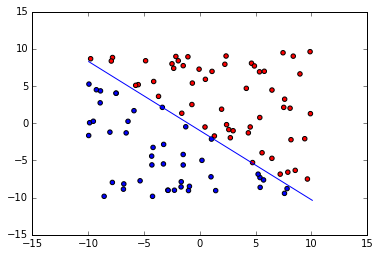

In [70]:
N = 100
points, m, b = data_faker(N, 0, 0, c=10, rand_div='yes')
scatter_plot(points, m, b, save='yes')

### Test of Perceptron with random data set:

In [66]:
N = 10
points, m, b = data_faker(N, 0, 0, c=10, rand_div='yes')
perc_m, perc_b = perceptron(points, video='yes', m=m, b=b, vid_dir = './vid')

### Test of Perceptron with XOR case:

In [71]:
points = xor()
perc_m, perc_b = perceptron(points, n_iter=3, video='yes', m=0, b=0, vid_dir = './vid')